In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')
from pylab import mpl
mpl.rcParams['font.sans-serif'] = ['SimHei']  #解决seaborn中文字体显示问题
plt.rc('figure', figsize=(10, 10))  #把plt默认的图片size调大一点
plt.rcParams["figure.dpi"] =mpl.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题
%matplotlib inline

In [2]:
data = pd.read_csv('D:\工作数据\HXD1D-EVE数据\EVE#240#0106#20190310163229#20190310195600.csv',encoding='gbk')
# 文件中有中文，所以要改变解码格式

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40960 entries, 0 to 40959
Columns: 648 entries, 时间 to 预留
dtypes: float64(80), int64(567), object(1)
memory usage: 202.5+ MB


In [4]:
data.columns

Index(['时间', '机车牵引/制动力设定值kN', '机车牵引/制动力实际值kN', '机车速度设定值km/h', '机车实际速度值km/h',
       '原边电压综合值V', '1轴电机温度℃', '2轴电机温度℃', '3轴电机温度℃', '1轴实际牵引/制动力kN',
       ...
       '机车处于分相区->TCU2', '左侧库内动车命令->TCU2', 'II端语音箱报警', 'II端微机复位',
       'ETS:1路接地隔离开关处于闭合状态', 'ETS:2路接地隔离开关处于闭合状态', 'ETS:集控隔离开关处于闭合状态',
       'ETS:1路列供故障跳主断命令', 'ETS:2路列供故障跳主断命令', '预留'],
      dtype='object', length=648)

In [5]:
print(type(data))

<class 'pandas.core.frame.DataFrame'>


1.清洗数据，把列车速度为零的行删除掉

In [6]:
print(type(data))

<class 'pandas.core.frame.DataFrame'>


In [7]:
data = data[~data['机车速度设定值km/h'].isin([0])]

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14739 entries, 0 to 40959
Columns: 648 entries, 时间 to 预留
dtypes: float64(80), int64(567), object(1)
memory usage: 73.0+ MB


2.仅保留需要的数据

In [9]:
col_keep = ['时间','I架Ud3中间直流电压V']

In [10]:
data = data[col_keep]

In [11]:
data.sample(5)

,时间,I架Ud3中间直流电压V
10493,2019-03-10 17:24:57,947.0
25175,2019-03-10 18:38:22,828.0
8090,2019-03-10 17:12:56,703.0
20983,2019-03-10 18:17:24,910.0
10386,2019-03-10 17:24:25,865.0


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14739 entries, 0 to 40959
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   时间            14739 non-null  object 
 1   I架Ud3中间直流电压V  14739 non-null  float64
dtypes: float64(1), object(1)
memory usage: 345.4+ KB


In [13]:
sns.set(style="darkgrid")

In [14]:
data = data.iloc[:100,:]

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   时间            100 non-null    object 
 1   I架Ud3中间直流电压V  100 non-null    float64
dtypes: float64(1), object(1)
memory usage: 2.3+ KB


In [16]:
%matplotlib inline
mpl.rcParams['font.sans-serif'] = ['KaiTi']
mpl.rcParams['font.serif'] = ['KaiTi']

<Figure size 1440x3600 with 0 Axes>

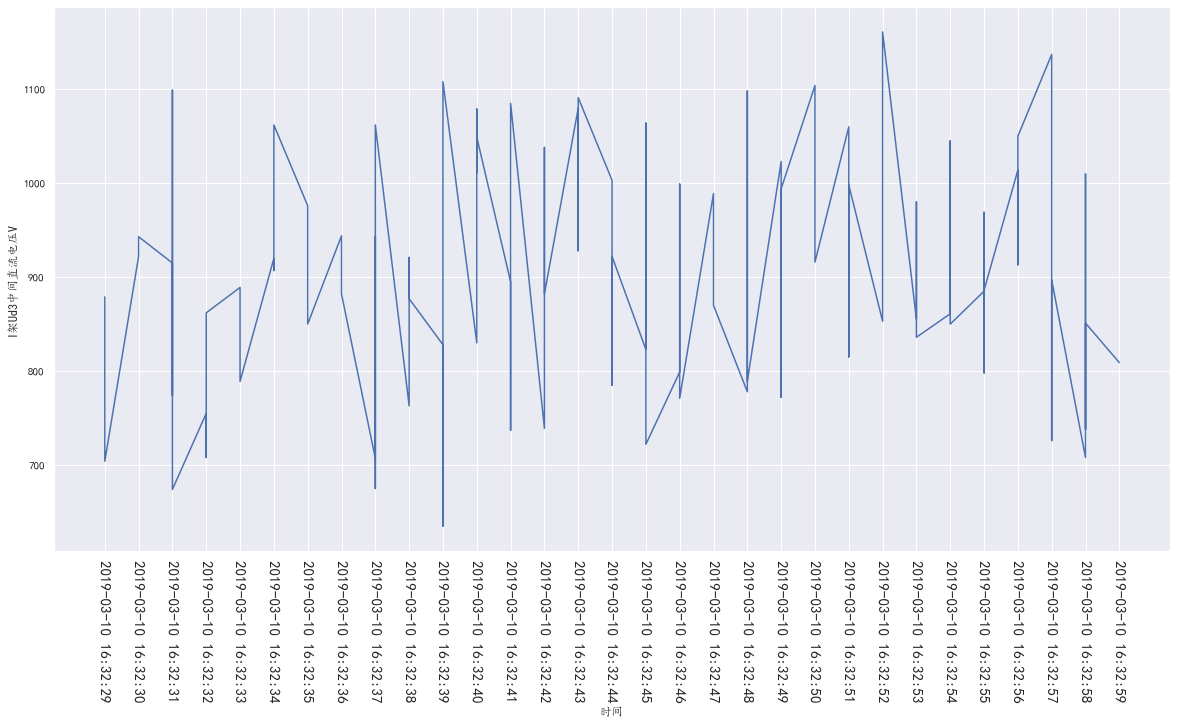

<Figure size 1440x3600 with 0 Axes>

In [17]:
plt.figure(figsize=(20,10)) 
plt.plot(data['时间'],data['I架Ud3中间直流电压V'])
plt.tick_params(axis='x', labelsize=15) 
plt.xticks(rotation=-90)

plt.xlabel("时间")
plt.ylabel("I架Ud3中间直流电压V")
plt.figure(figsize=(20,50)) 

简单的滤波,先对每一秒的所有电压值求一个均值

In [18]:
n = 0
while n < 99:
    if data.at[n,'时间'] == data.at[n + 1,'时间']:
        if data.at[n + 1,'时间'] == data.at[n + 2,'时间']:
            if data.at[n + 2,'时间'] == data.at[n + 3,'时间']:
                data.loc[n:n + 4,'I架Ud3中间直流电压V'] =  data.loc[n:n + 4,'I架Ud3中间直流电压V'].mean()
                n = n + 4
                continue
            else:
                data.loc[n:n + 3,'I架Ud3中间直流电压V'] =  data.loc[n:n + 3,'I架Ud3中间直流电压V'].mean()
                n = n + 3
                continue
        else:
            data.loc[n:n + 3,'I架Ud3中间直流电压V'] =  data.loc[n:n + 3,'I架Ud3中间直流电压V'].mean()
            n = n + 2
            continue
    else:
        n = n + 1
        continue

In [20]:


#显示所有列
pd.set_option('display.max_columns', None)
#显示所有行
pd.set_option('display.max_rows',None)
print(data)

                     时间  I架Ud3中间直流电压V
0   2019-03-10 16:32:29    861.250000
1   2019-03-10 16:32:29    861.250000
2   2019-03-10 16:32:30    895.125000
3   2019-03-10 16:32:30    895.125000
4   2019-03-10 16:32:30    895.125000
5   2019-03-10 16:32:31    839.425000
6   2019-03-10 16:32:31    839.425000
7   2019-03-10 16:32:31    839.425000
8   2019-03-10 16:32:31    839.425000
9   2019-03-10 16:32:32    824.606250
10  2019-03-10 16:32:32    824.606250
11  2019-03-10 16:32:32    824.606250
12  2019-03-10 16:32:33    830.651562
13  2019-03-10 16:32:33    830.651562
14  2019-03-10 16:32:33    830.651562
15  2019-03-10 16:32:34    941.730313
16  2019-03-10 16:32:34    941.730313
17  2019-03-10 16:32:34    941.730313
18  2019-03-10 16:32:34    941.730313
19  2019-03-10 16:32:35    922.932578
20  2019-03-10 16:32:35    922.932578
21  2019-03-10 16:32:35    922.932578
22  2019-03-10 16:32:36    859.233145
23  2019-03-10 16:32:36    859.233145
24  2019-03-10 16:32:36    859.233145
25  2019-03-

<Figure size 1440x3600 with 0 Axes>

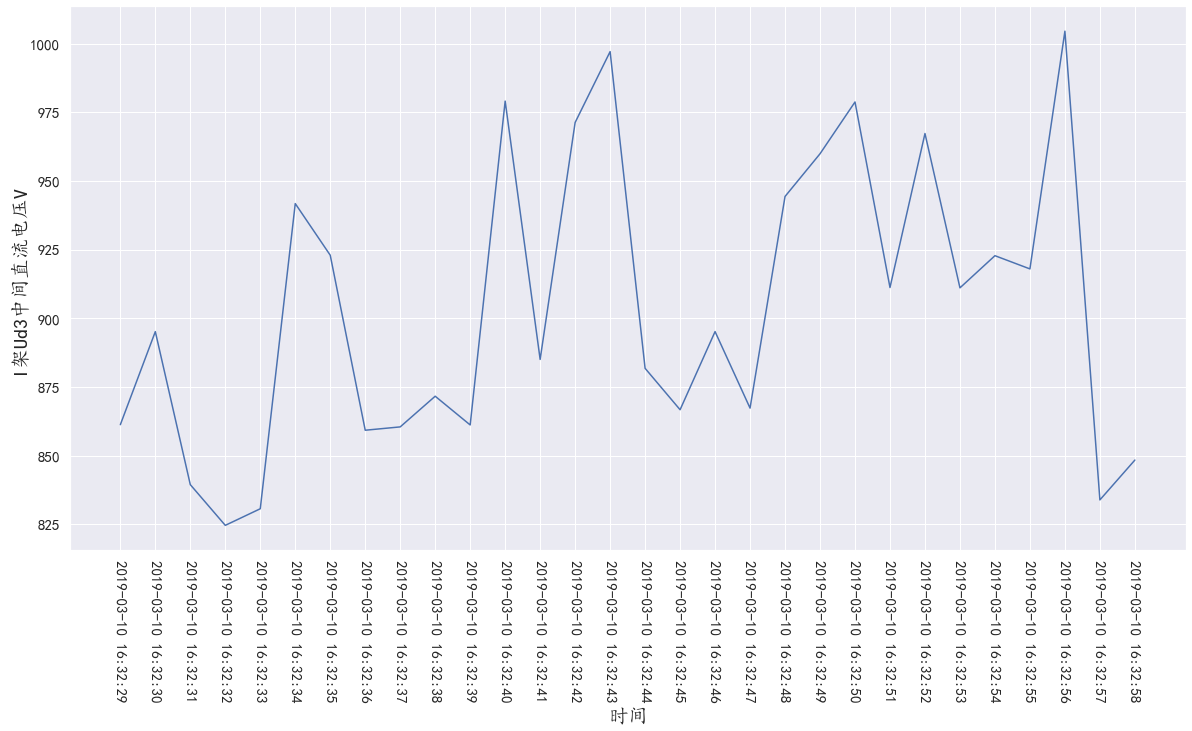

<Figure size 1440x3600 with 0 Axes>

In [19]:
data.drop_duplicates(subset='I架Ud3中间直流电压V', inplace=True)# 去重
plt.figure(figsize=(20,10)) 
plt.plot(data['时间'],data['I架Ud3中间直流电压V'])
plt.tick_params(axis='x', labelsize=15) 
plt.tick_params(axis='y', labelsize=15)
plt.xticks(rotation=-90)

plt.xlabel("时间",fontsize=20)
plt.ylabel("I架Ud3中间直流电压V",fontsize=20)
plt.figure(figsize=(20,50)) 

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30 entries, 0 to 95
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   时间            30 non-null     object 
 1   I架Ud3中间直流电压V  30 non-null     float64
dtypes: float64(1), object(1)
memory usage: 720.0+ bytes


In [21]:
data.index = range(len(data))

In [22]:
# 限幅滤波法  
for n in range(0,29):
    if (data.at[n+1,'I架Ud3中间直流电压V'] - data.at[n,'I架Ud3中间直流电压V'] >=75) or (data.at[n,'I架Ud3中间直流电压V'] - data.at[n+1,'I架Ud3中间直流电压V']>= 75):
        data.at[n+1,'I架Ud3中间直流电压V'] = data.at[n,'I架Ud3中间直流电压V'] 

In [27]:
print(data)

                     时间  I架Ud3中间直流电压V
0   2019-03-10 16:32:29    861.250000
1   2019-03-10 16:32:30    895.125000
2   2019-03-10 16:32:31    895.125000
3   2019-03-10 16:32:32    895.125000
4   2019-03-10 16:32:33    895.125000
5   2019-03-10 16:32:34    895.125000
6   2019-03-10 16:32:35    922.932578
7   2019-03-10 16:32:36    922.932578
8   2019-03-10 16:32:37    922.932578
9   2019-03-10 16:32:38    922.932578
10  2019-03-10 16:32:39    922.932578
11  2019-03-10 16:32:40    922.932578
12  2019-03-10 16:32:41    885.007646
13  2019-03-10 16:32:42    885.007646
14  2019-03-10 16:32:43    885.007646
15  2019-03-10 16:32:44    881.762596
16  2019-03-10 16:32:45    866.690649
17  2019-03-10 16:32:46    895.138130
18  2019-03-10 16:32:47    867.284532
19  2019-03-10 16:32:48    867.284532
20  2019-03-10 16:32:49    867.284532
21  2019-03-10 16:32:50    867.284532
22  2019-03-10 16:32:51    867.284532
23  2019-03-10 16:32:52    867.284532
24  2019-03-10 16:32:53    867.284532
25  2019-03-

<Figure size 1440x3600 with 0 Axes>

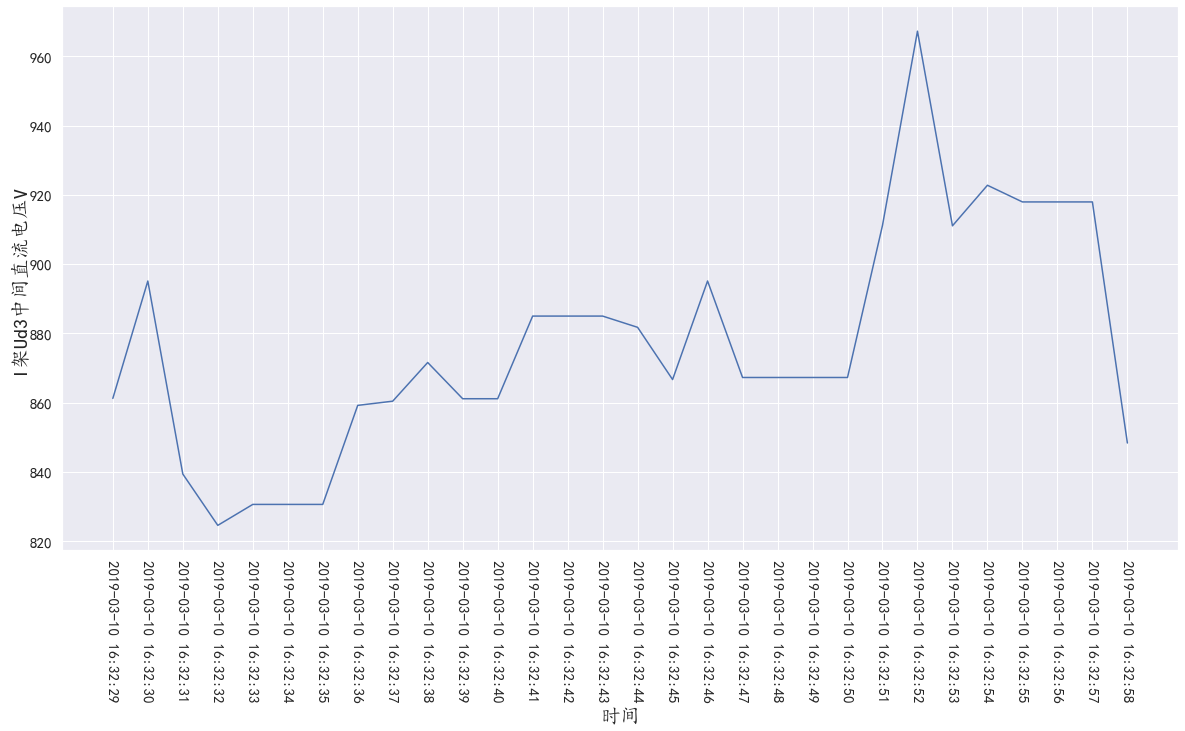

<Figure size 1440x3600 with 0 Axes>

In [23]:
plt.figure(figsize=(20,10)) 
plt.plot(data['时间'],data['I架Ud3中间直流电压V'])
plt.tick_params(axis='x', labelsize=15) 
plt.tick_params(axis='y', labelsize=15)
plt.xticks(rotation=-90)

plt.xlabel("时间",fontsize=20)
plt.ylabel("I架Ud3中间直流电压V",fontsize=20)
plt.figure(figsize=(20,50)) 

In [25]:
# 算术平均滤波法
for n in range(0,27):
     data.loc[n:n + 3,'I架Ud3中间直流电压V'] =  data.loc[n:n + 3,'I架Ud3中间直流电压V'].mean()

<Figure size 1440x3600 with 0 Axes>

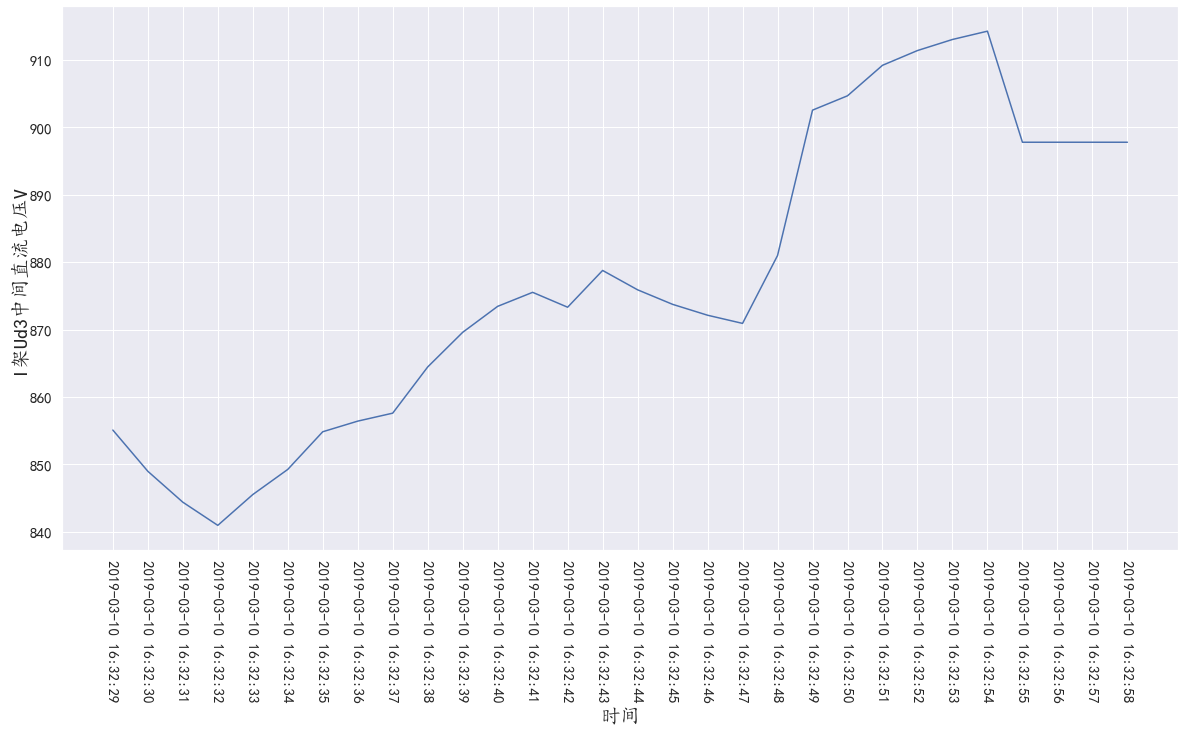

<Figure size 1440x3600 with 0 Axes>

In [26]:
plt.figure(figsize=(20,10)) 
plt.plot(data['时间'],data['I架Ud3中间直流电压V'])
plt.tick_params(axis='x', labelsize=15) 
plt.tick_params(axis='y', labelsize=15)
plt.xticks(rotation=-90)

plt.xlabel("时间",fontsize=20)
plt.ylabel("I架Ud3中间直流电压V",fontsize=20)
plt.figure(figsize=(20,50)) 